In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.spatial import distance
from scipy.cluster import hierarchy
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from scipy.cluster.hierarchy import fcluster
import process_data

In [5]:
data=process_data.process('all_data.csv')
X,y=process_data.split_x_y(data)

In [18]:
data_normalized1=process_data.normalize_data(data,1)
X_nomalized1=process_data.split_x_y(data_normalized1)[0]

In [15]:
data_normalized0=process_data.normalize_data(data,0)
X_nomalized0=process_data.split_x_y(data_normalized0)[0]

In [21]:
X_nomalized0['ENSG00000000003'].sum()

1.0

In [22]:
X_nomalized1.iloc[2,:].sum()

0.9999999999999977

In [23]:
gene_expressions_normalized0=X_nomalized0.describe().T

In [24]:
gene_expressions_normalized0

,count,mean,std,min,25%,50%,75%,max
ENSG00000223972,491.0,0.002037,0.004189,0.000000,0.000000,0.000000,0.002573,0.047753
ENSG00000227232,491.0,0.002037,0.001197,0.000378,0.001186,0.001738,0.002552,0.009938
ENSG00000243485,491.0,0.002037,0.015051,0.000000,0.000000,0.000000,0.000000,0.255377
ENSG00000268020,491.0,0.002037,0.022465,0.000000,0.000000,0.000000,0.000000,0.438382
ENSG00000240361,491.0,0.002037,0.037800,0.000000,0.000000,0.000000,0.000000,0.833313
...,...,...,...,...,...,...,...,...
ENSG00000238477,491.0,0.002037,0.010382,0.000000,0.000000,0.000000,0.000000,0.123344
ENSG00000271726,491.0,0.002037,0.020763,0.000000,0.000000,0.000000,0.000000,0.295235
ENSG00000215616,491.0,0.002037,0.032339,0.000000,0.000000,0.000000,0.000000,0.585118
ENSG00000265557,491.0,0.002037,0.009393,0.000000,0.000000,0.000000,0.000000,0.121308


In [27]:
gene_expressions_normalized1=X_nomalized1.describe().T

In [28]:
gene_expressions_normalized1

,count,mean,std,min,25%,50%,75%,max
ENSG00000223972,491.0,2.765680e-08,5.688811e-08,0.000000,0.000000,0.000000,3.494539e-08,6.484644e-07
ENSG00000227232,491.0,1.277214e-05,7.505720e-06,0.000002,0.000007,0.000011,1.600456e-05,6.232437e-05
ENSG00000243485,491.0,1.272477e-09,9.403365e-09,0.000000,0.000000,0.000000,0.000000e+00,1.595563e-07
ENSG00000268020,491.0,1.859184e-09,2.050772e-08,0.000000,0.000000,0.000000,0.000000e+00,4.001809e-07
ENSG00000240361,491.0,2.217028e-09,4.114797e-08,0.000000,0.000000,0.000000,0.000000e+00,9.071122e-07
...,...,...,...,...,...,...,...,...
ENSG00000238477,491.0,7.080783e-08,3.609446e-07,0.000000,0.000000,0.000000,0.000000e+00,4.288247e-06
ENSG00000271726,491.0,6.168644e-09,6.288812e-08,0.000000,0.000000,0.000000,0.000000e+00,8.942090e-07
ENSG00000215616,491.0,1.461966e-10,2.321389e-09,0.000000,0.000000,0.000000,0.000000e+00,4.200125e-08
ENSG00000265557,491.0,6.145525e-08,2.834293e-07,0.000000,0.000000,0.000000,0.000000e+00,3.660413e-06


In [29]:
max(gene_expressions_normalized1['mean'])

0.036784790260958294

In [30]:
CorrPatients=np.corrcoef(X)
CorrPatients_normalized0=np.corrcoef(X_nomalized0)
CorrPatients_normalized1=np.corrcoef(X_nomalized1)

In [34]:
CorrGenes=np.corrcoef(X.T)

/home/irit/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/irit/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


<Axes: >

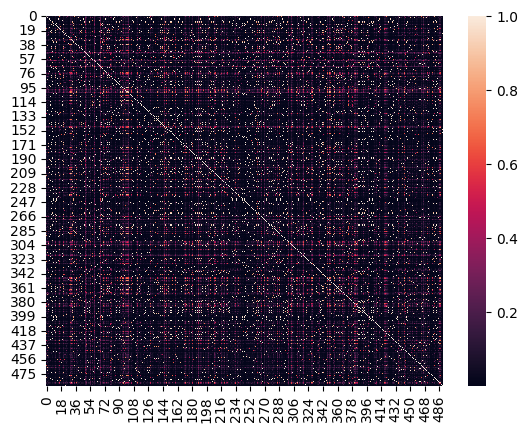

In [33]:
sns.heatmap(CorrPatients_normalized1)

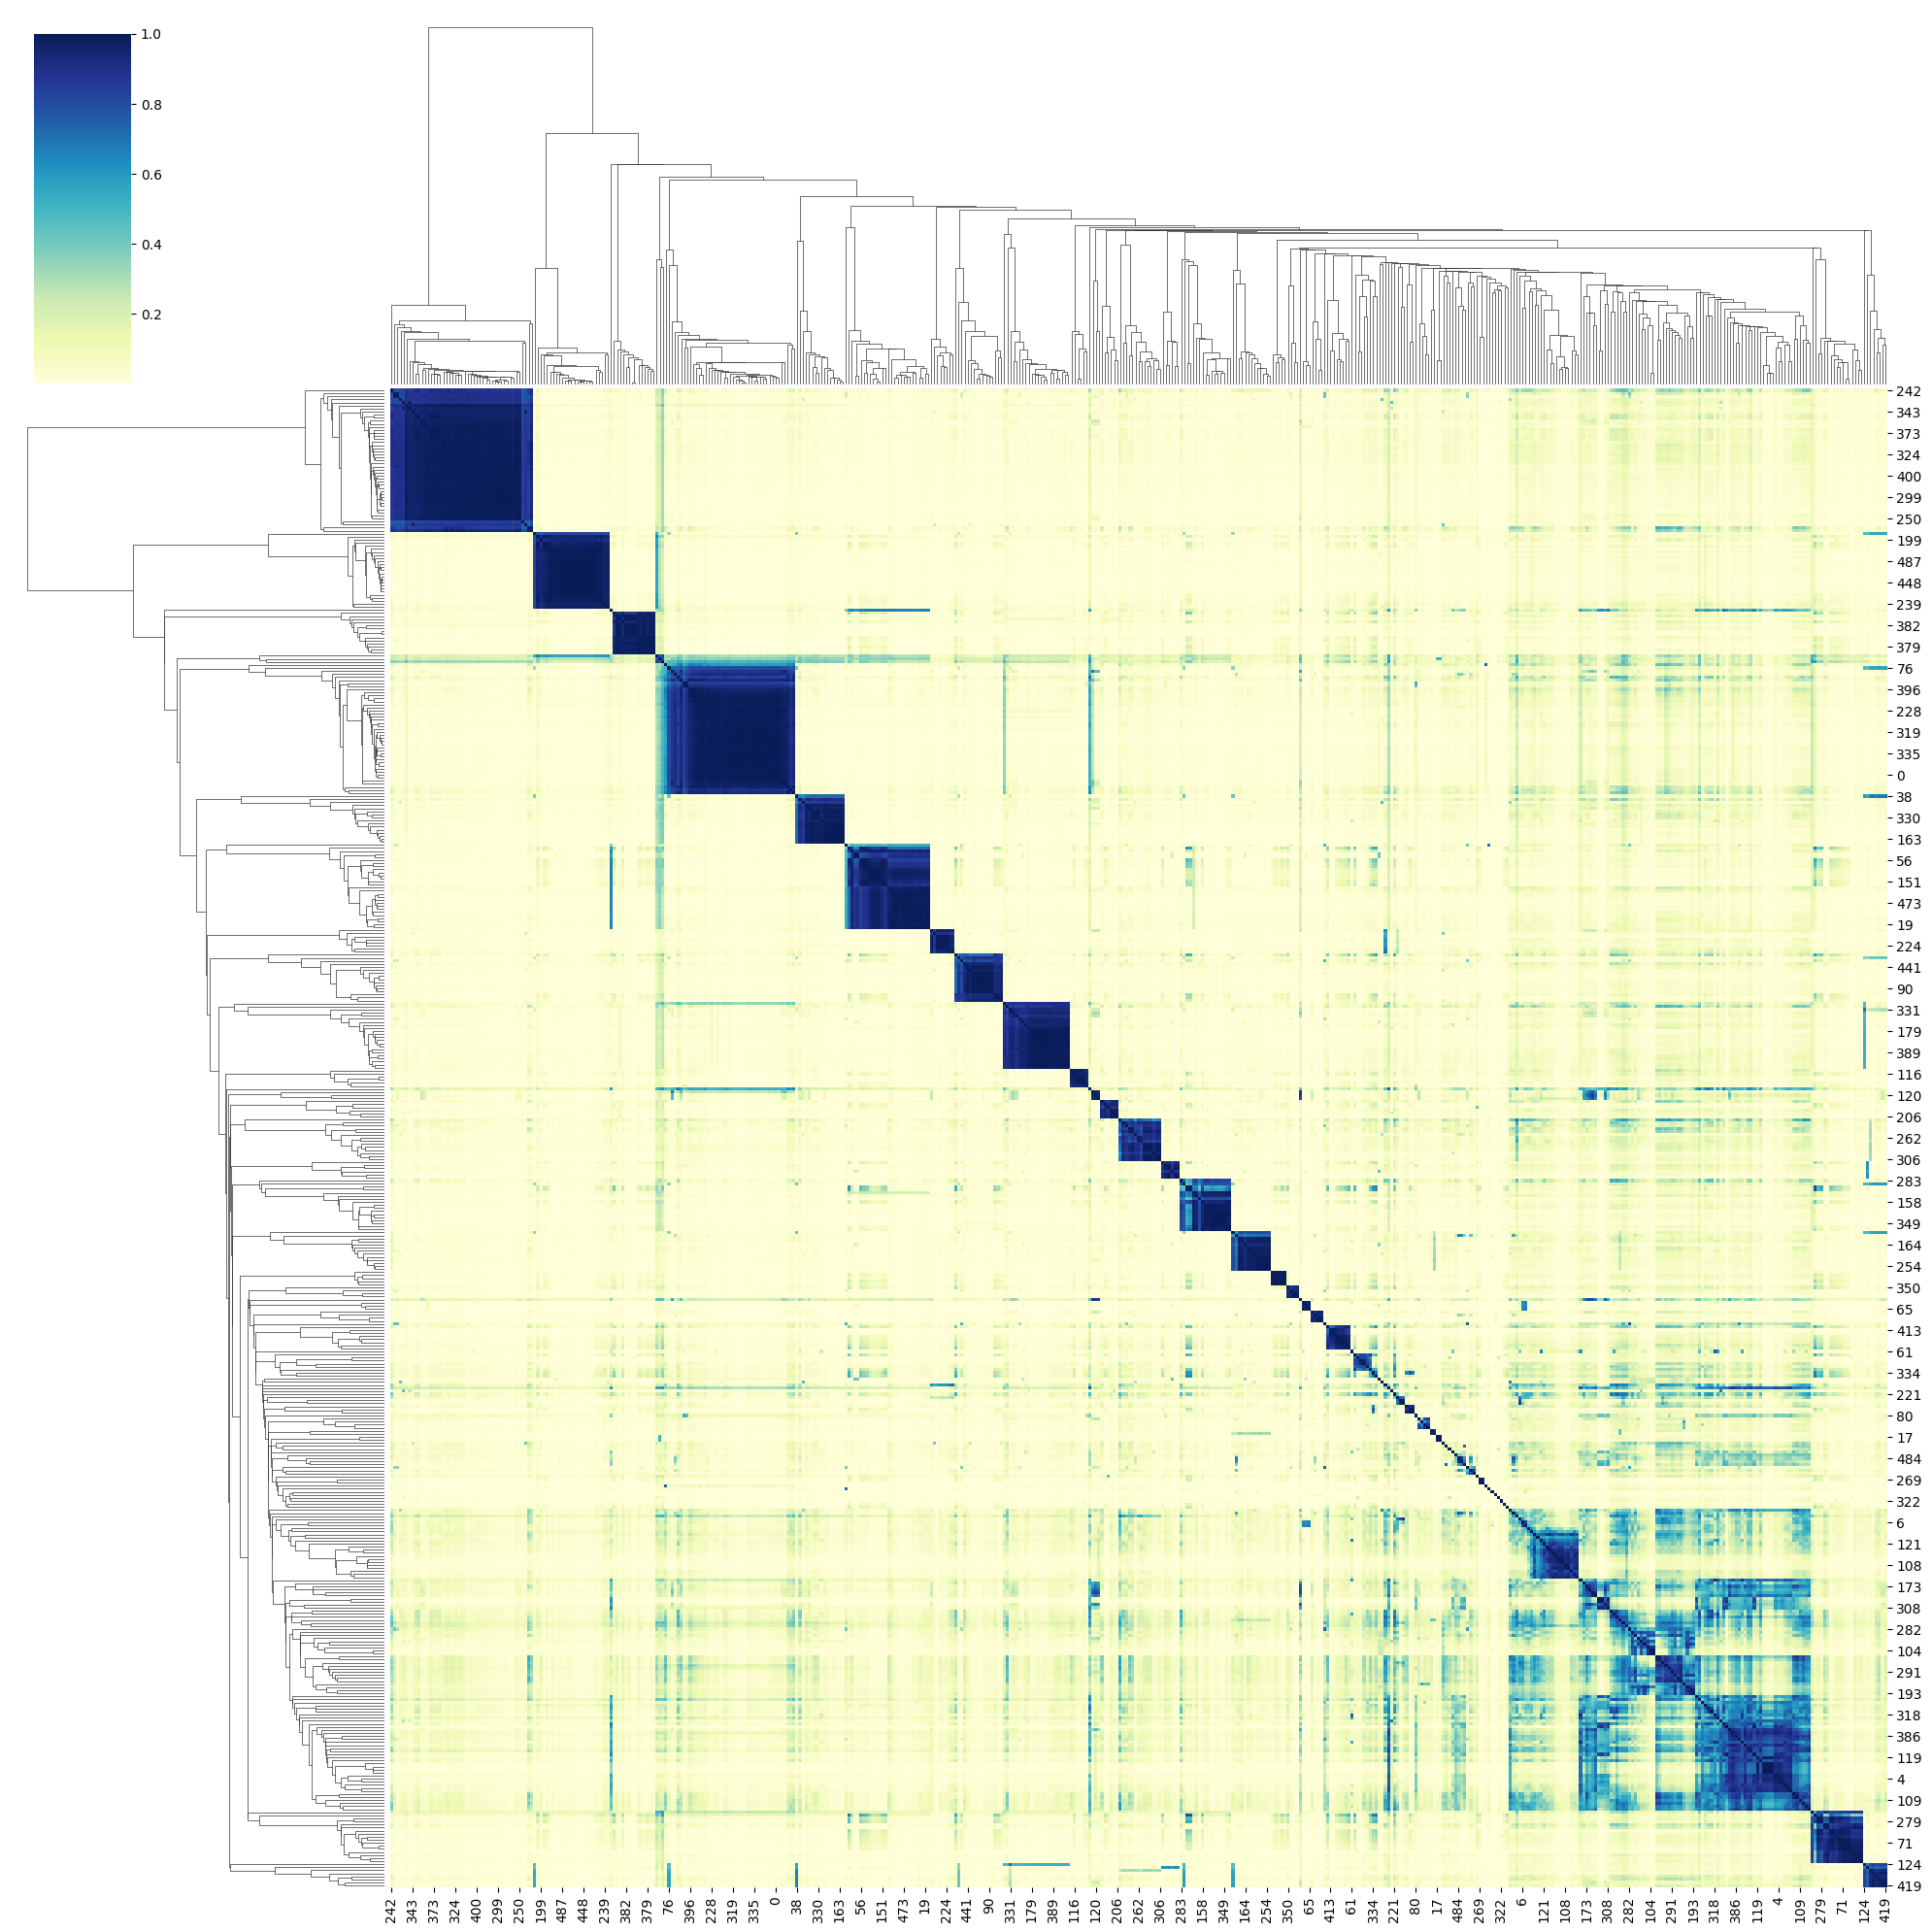

In [4]:
from scipy.spatial import distance
from scipy.cluster import hierarchy

row_linkage = hierarchy.linkage(
    distance.pdist(CorrPatients), method='single')
col_linkage = hierarchy.linkage(
    distance.pdist(CorrPatients.T), method='single')
    
cl=sns.clustermap(CorrPatients, row_linkage=row_linkage,col_linkage=col_linkage,figsize=(20, 20), cmap="YlGnBu")
cl.savefig('CorrelationClusteringEuclidean.pdf') 

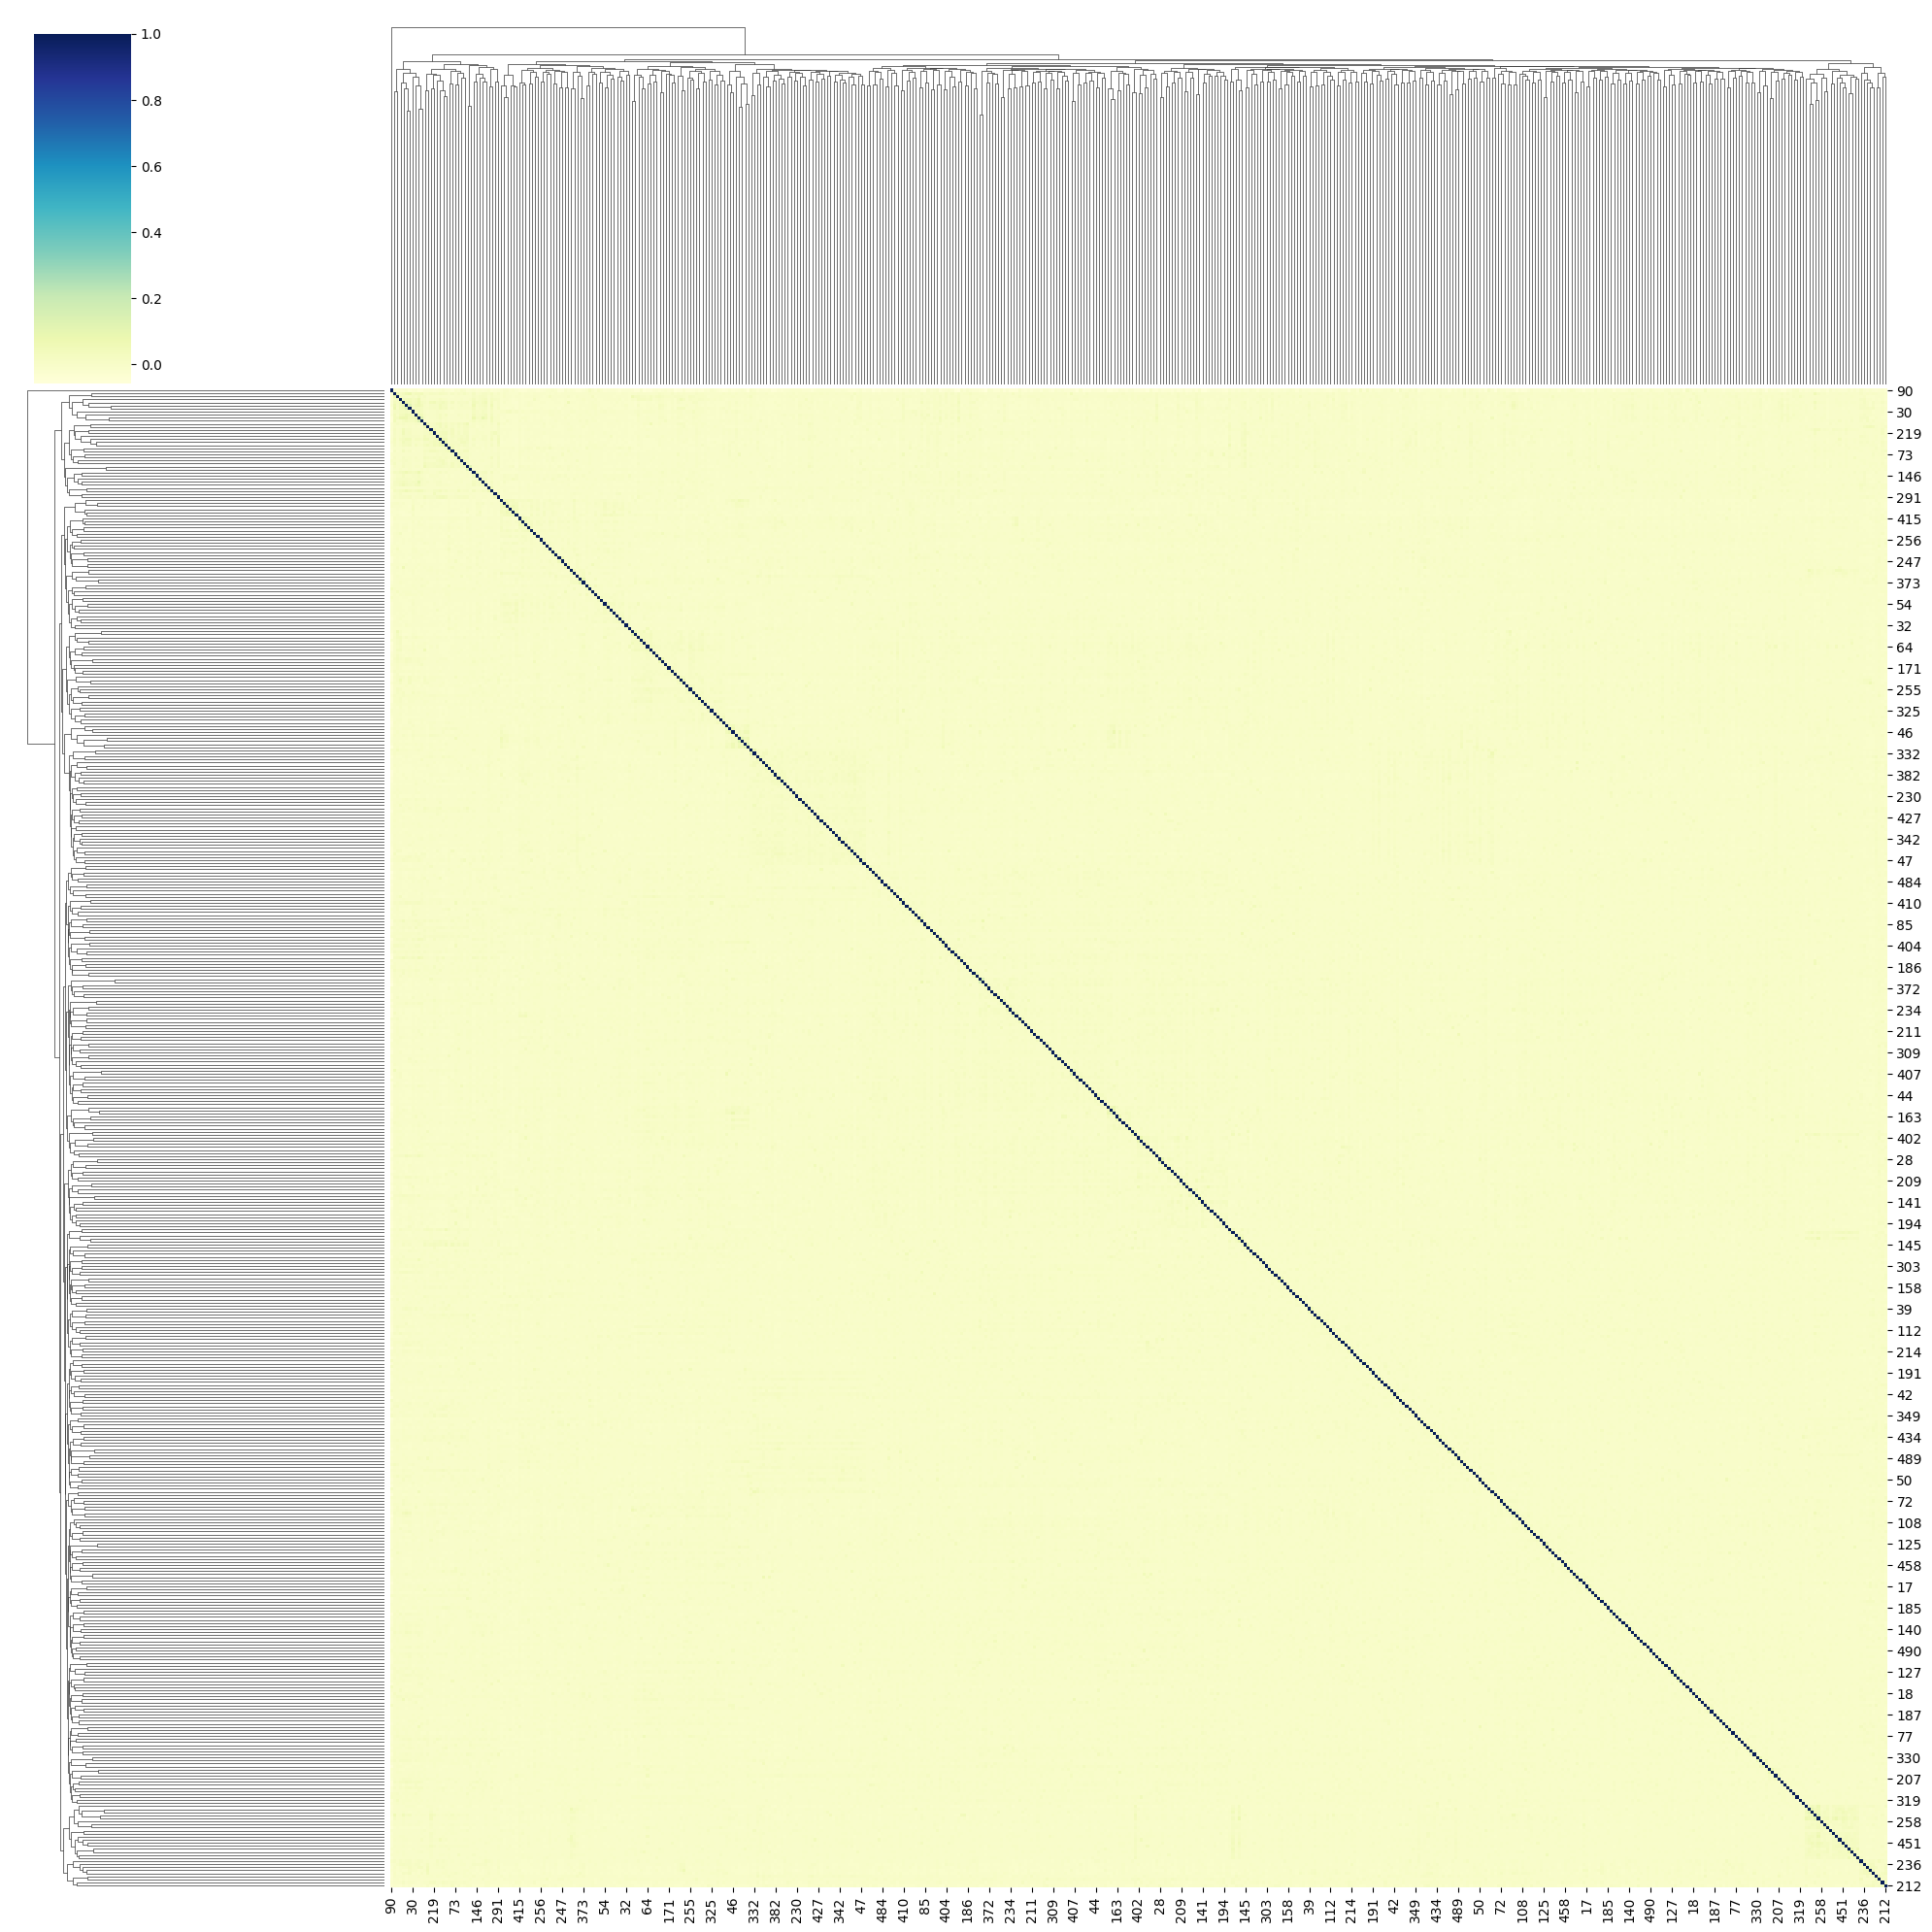

In [35]:
from scipy.spatial import distance
from scipy.cluster import hierarchy

row_linkage = hierarchy.linkage(
    distance.pdist(CorrPatients_normalized0), method='complete')
col_linkage = hierarchy.linkage(
    distance.pdist(CorrPatients_normalized0.T), method='complete')
    
cl=sns.clustermap(CorrPatients_normalized0, row_linkage=row_linkage,col_linkage=col_linkage,figsize=(20, 20), cmap="YlGnBu")
cl.savefig('CorrelationClusteringEuclidean.pdf') 

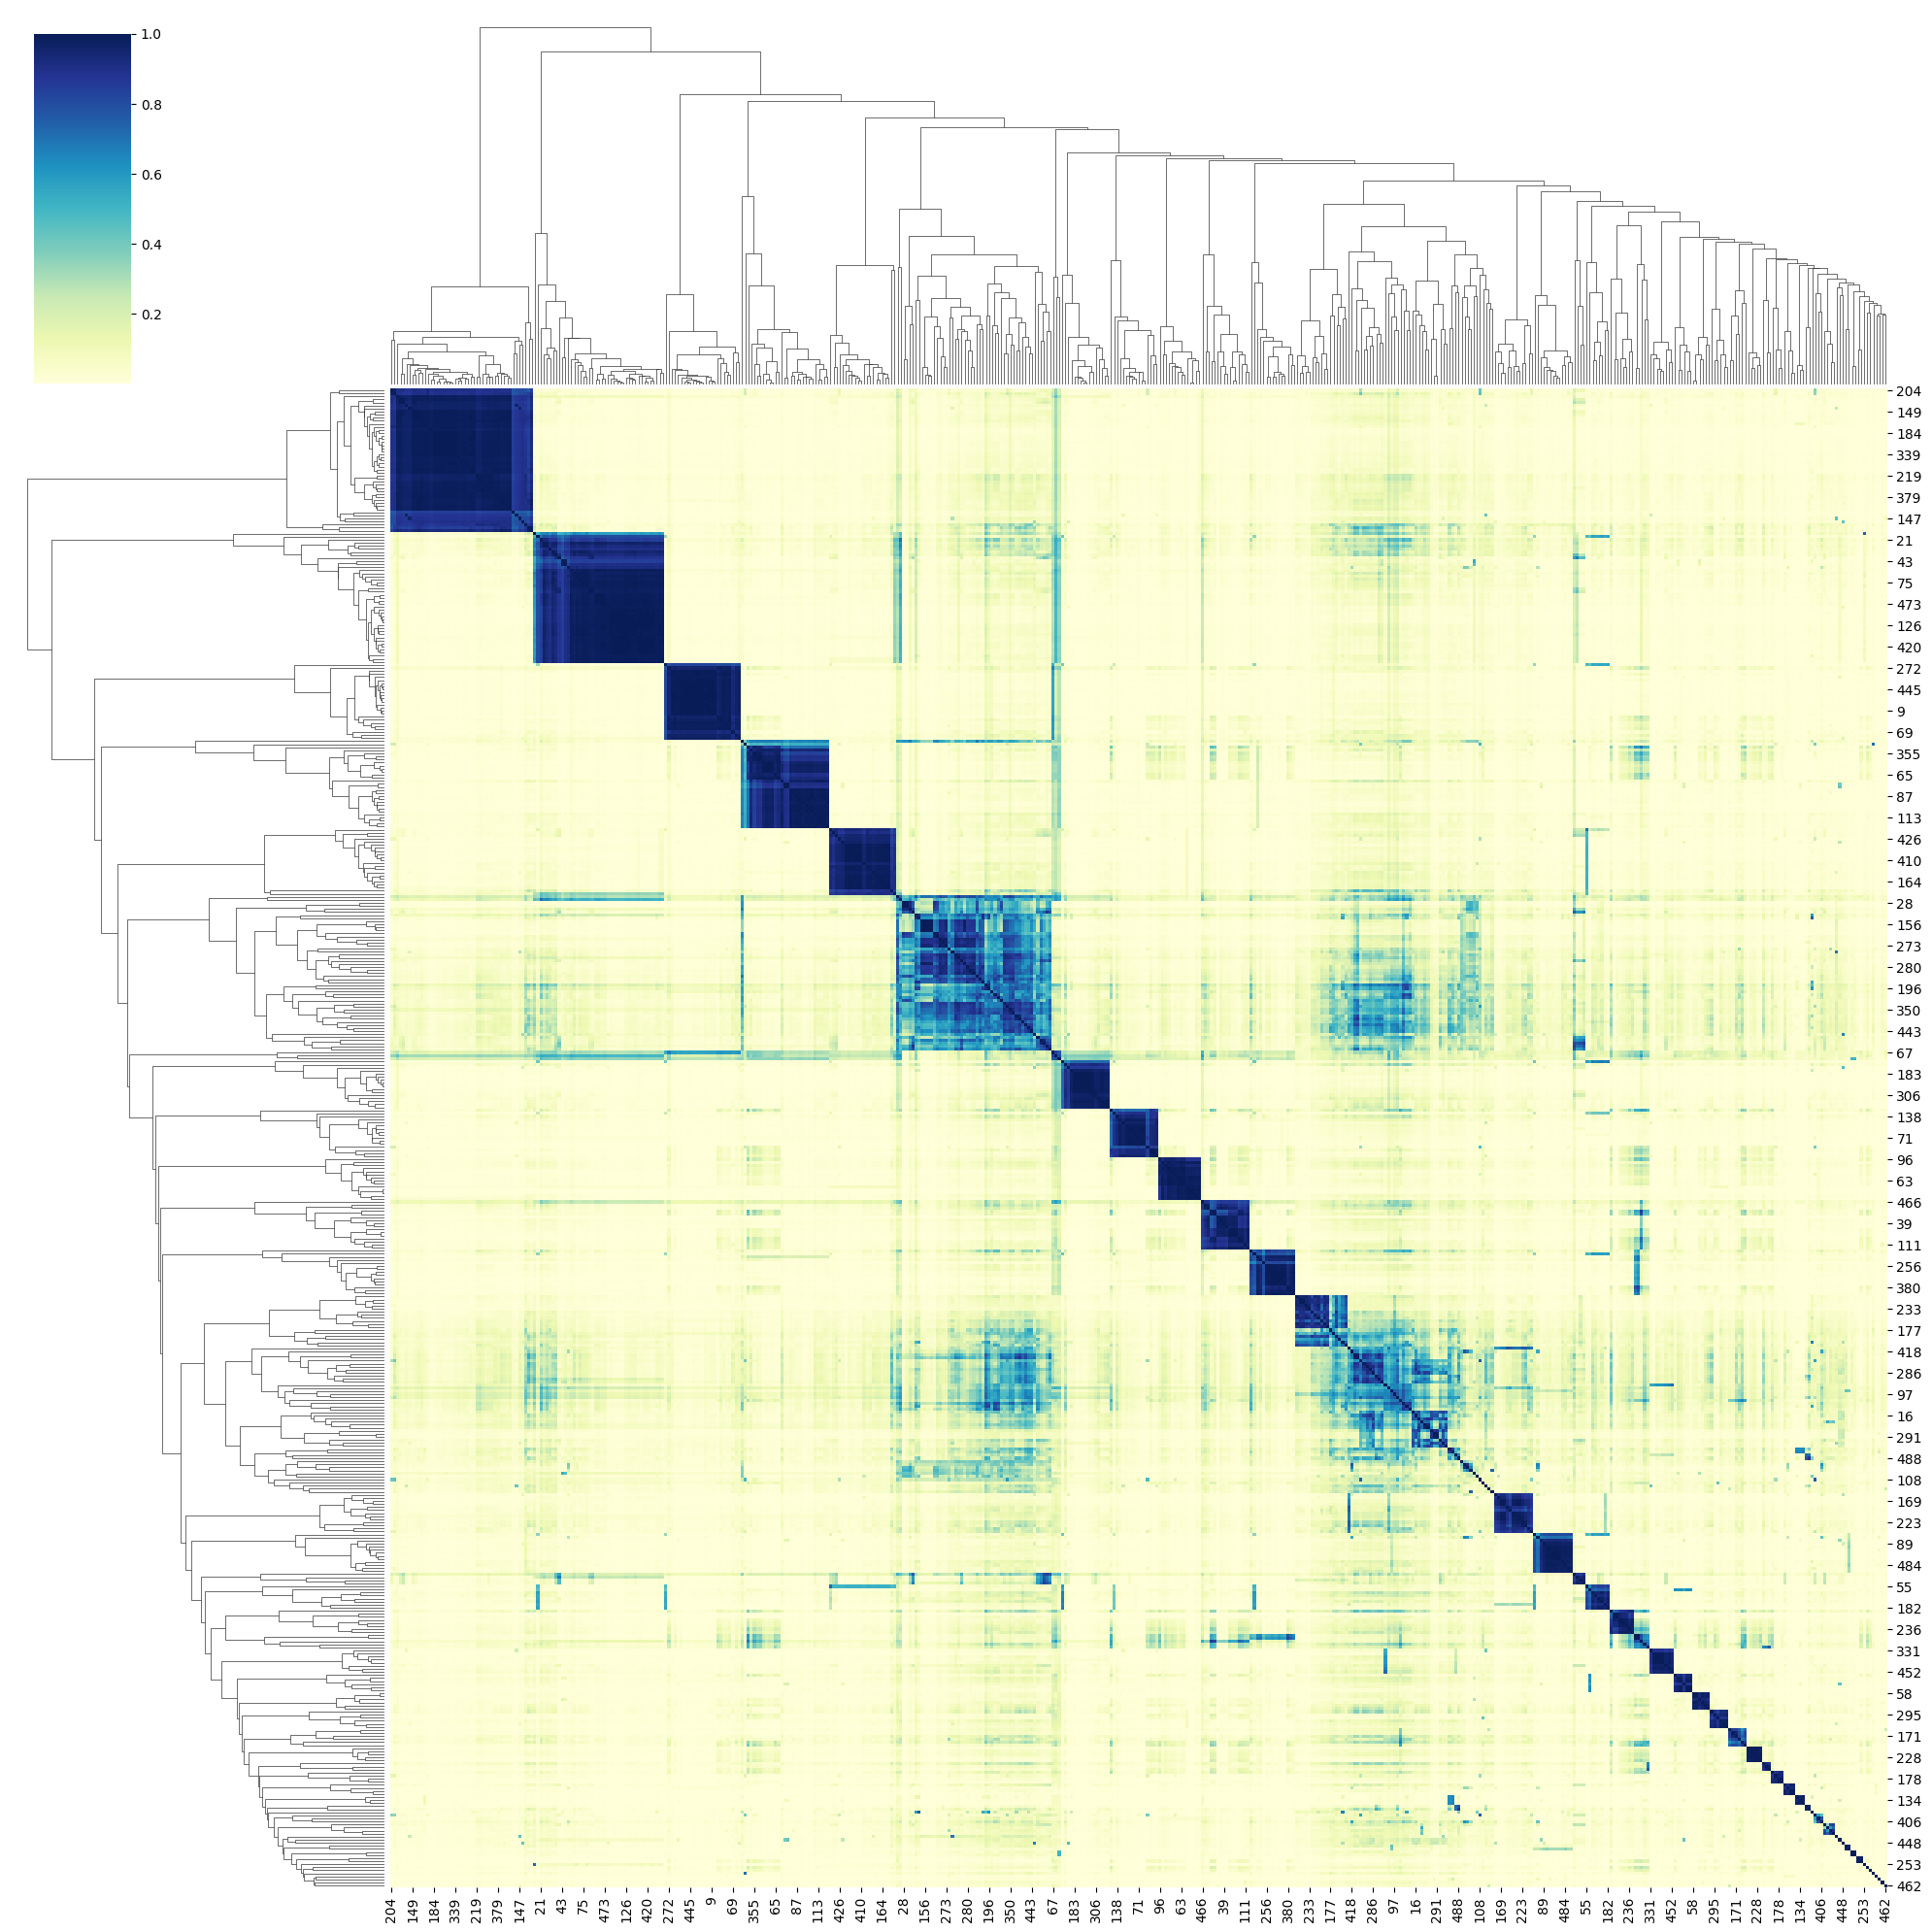

In [90]:
from scipy.spatial import distance
from scipy.cluster import hierarchy

row_linkage = hierarchy.linkage(
    distance.pdist(CorrPatients_normalized1,metric='euclidean'), method='average')
col_linkage = hierarchy.linkage(
    distance.pdist(CorrPatients_normalized1,metric='euclidean'), method='average')
    
cl=sns.clustermap(CorrPatients_normalized1, row_linkage=row_linkage,col_linkage=col_linkage,figsize=(20, 20), cmap="YlGnBu")
cl.savefig('CorrelationClusteringCosine.pdf') 

In [40]:
def get_clusters(X,linkage,nb_clusters):
    fl = fcluster(linkage,nb_clusters,criterion='maxclust')
    clusters=[]
    for i in range(nb_clusters):
        df=X.iloc[np.where(fl==i+1)]
        clusters.append(df)
    return clusters

In [65]:
def get_gene_stats(cluster):
    gene_expressions=pd.DataFrame(columns=['min','max','moyenne','écart_type',],index=cluster.columns)
    gene_expressions['min']=cluster[cluster.columns].min()
    gene_expressions['max']=cluster[cluster.columns].max()
    gene_expressions['moyenne']=cluster[cluster.columns].mean()
    gene_expressions['écart_type']=cluster[cluster.columns].std()
    return gene_expressions

In [83]:
def get_MRD_stats(cluster):
    return pd.concat([cluster,y],axis=1).groupby('MRD Response').count().iloc[:,1][0]/len(cluster)*100

In [159]:
def diff_expression(df1,df2):
    return set(df1[((df1['moyenne']>0) & (df2['moyenne']==0)) | ((df2['moyenne']>0) & (df1['moyenne']==0))].index)

In [100]:
clusters=get_clusters(X_nomalized0,row_linkage,4)
cluster_1=clusters[0]
cluster_2=clusters[1]
cluster_3=clusters[2]
cluster_4=clusters[3]

In [102]:
print('Le pourcentage de patients qui sont détectés MRD- est :')
print('cluster 1',get_MRD_stats(cluster_1))
print('cluster 2',get_MRD_stats(cluster_2))
print('cluster 3',get_MRD_stats(cluster_3))
print('cluster 3',get_MRD_stats(cluster_4))

Le pourcentage de patients qui sont détectés MRD- est :
cluster 1 48.93617021276596
cluster 2 44.18604651162791
cluster 3 52.0
cluster 3 53.45744680851063


In [138]:
get_gene_stats(cluster_1).compare(get_gene_stats(cluster_2)).to_csv('/home/syrine/Myeloma-project/diff.csv')

In [164]:
df1=get_gene_stats(cluster_1)
df2=get_gene_stats(cluster_2)
df3=get_gene_stats(cluster_3)

In [173]:
diff_expression(df3,df2) & diff_expression (df2,df1)

{'ENSG00000228064',
 'ENSG00000261580',
 'ENSG00000216127',
 'ENSG00000254394',
 'ENSG00000260477',
 'ENSG00000244018',
 'ENSG00000265167',
 'ENSG00000252342',
 'ENSG00000207979',
 'ENSG00000221386',
 'ENSG00000200462',
 'ENSG00000234998',
 'ENSG00000250596',
 'ENSG00000253287',
 'ENSG00000244662',
 'ENSG00000201549',
 'ENSG00000253147',
 'ENSG00000258894',
 'ENSG00000270790',
 'ENSG00000200303',
 'ENSG00000215964',
 'ENSG00000221279',
 'ENSG00000231538',
 'ENSG00000227862',
 'ENSG00000263892',
 'ENSG00000270301',
 'ENSG00000226405',
 'ENSG00000208022',
 'ENSG00000223836',
 'ENSG00000271435',
 'ENSG00000183938',
 'ENSG00000215380',
 'ENSG00000243085',
 'ENSG00000229779',
 'ENSG00000254430',
 'ENSG00000259769',
 'ENSG00000238812',
 'ENSG00000262609',
 'ENSG00000255929',
 'ENSG00000265086',
 'ENSG00000227510',
 'ENSG00000167755',
 'ENSG00000254291',
 'ENSG00000199109',
 'ENSG00000235226',
 'ENSG00000182872',
 'ENSG00000237440',
 'ENSG00000252593',
 'ENSG00000268519',
 'ENSG00000212273',


In [135]:
get_gene_stats(cluster_2).T['ENSG00000264341']

min           0.000000
max           0.479030
moyenne       0.011140
écart_type    0.073051
Name: ENSG00000264341, dtype: float64

In [123]:
get_gene_stats(cluster_2).T['ENSG00000269308']

min           0.000000
max           0.041485
moyenne       0.000965
écart_type    0.006326
Name: ENSG00000269308, dtype: float64

In [104]:
get_gene_stats(cluster_2)

,min,max,moyenne,écart_type
ENSG00000223972,0.000000,0.011129,0.001140,0.002022
ENSG00000227232,0.000616,0.006575,0.002355,0.001497
ENSG00000243485,0.000000,0.059507,0.001384,0.009075
ENSG00000268020,0.000000,0.053095,0.001235,0.008097
ENSG00000240361,0.000000,0.044857,0.001043,0.006841
...,...,...,...,...
ENSG00000238477,0.000000,0.022825,0.000805,0.003879
ENSG00000271726,0.000000,0.000000,0.000000,0.000000
ENSG00000215616,0.000000,0.000000,0.000000,0.000000
ENSG00000265557,0.000000,0.034755,0.002401,0.007272


### Trial with other normalization methods

In [19]:
from rnalysis import filtering

In [ ]:
gui.run_gui()

In [15]:
filter=filtering.CountFilter('all_data_filtered.csv')

In [23]:
filter.normalize_tmm()

ZeroDivisionError: Weights sum to zero, can't be normalized

In [18]:
filter.head()

,ENSG00000223972,ENSG00000227232,ENSG00000243485,ENSG00000268020,ENSG00000240361,ENSG00000186092,ENSG00000238009,ENSG00000233750,ENSG00000237683,ENSG00000268903,...,ENSG00000244656,ENSG00000263760,ENSG00000264728,ENSG00000238667,ENSG00000238477,ENSG00000271726,ENSG00000215616,ENSG00000265557,ENSG00000238643,MRD Response
165-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
031-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
069-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
007-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
034-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
